# 1. Grundlagen der Datenbankerstellung und -verbindung

1. Frage: Erklären Sie, wie eine SQLite-Datenbank in Python erstellt wird. Was bewirkt der Befehl sqlite3.connect()?

- Antwort: *Der Befehl sqlite3.connect() erstellt eine Verbindung zu einer SQLite-Datenbankdatei. Wenn die Datei noch nicht existiert, wird sie erstellt. Über diese Verbindung können SQL-Befehle ausgeführt werden, um Daten zu lesen oder zu schreiben.*

2. Aufgabe und Lösung:

- Erstellen Sie eine neue SQLite-Datenbank namens student_database.db. Legen Sie eine Tabelle students mit den Spalten StudentId, Name, und Age an.

In [1]:
import sqlite3

# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('student_database.db')
cursor = conn.cursor()

# Tabelle erstellen
cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        StudentId INTEGER PRIMARY KEY,
        Name TEXT NOT NULL,
        Age INTEGER
    );
''')

# Änderungen speichern und Verbindung schließen
conn.commit()
conn.close()


# 2. Erstellen und Verändern von Tabellen

1. Frage: Was bewirkt die SQL-Anweisung CREATE TABLE IF NOT EXISTS? Wann ist sie sinnvoll?

- Antwort: *CREATE TABLE IF NOT EXISTS erstellt eine Tabelle nur dann, wenn diese Tabelle noch nicht existiert. Das verhindert Fehler, falls die Tabelle bereits vorhanden ist.*

2. Aufgabe und Lösung:

- Fügen Sie eine neue Spalte Location zur Tabelle apartments_table in der apartment_database.db hinzu. Geben Sie dann alle Datensätze in dieser Tabelle aus.

In [2]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')
cursor = conn.cursor()

# Neue Spalte zur Tabelle hinzufügen
cursor.execute("ALTER TABLE apartments_table ADD COLUMN Location TEXT;")

# Alle Datensätze abfragen
cursor.execute("SELECT * FROM apartments_table")
data = cursor.fetchall()

# Anzeigen der Datensätze
for row in data:
    print(row)

# Verbindung schließen
conn.close()


('1662023695-433', 3.5, 122.0, 3180.0, 26.065573770491802, None)
('1662023745-820', 2.5, 78.0, 3760.0, 48.205128205128204, None)
('1662023742-807', 5.5, 115.0, 2860.0, 24.869565217391305, None)
('1662023804-1290', 3.5, 74.0, 2165.0, 29.256756756756758, None)
('1662023739-771', 5.5, 195.0, 6900.0, 35.38461538461539, None)
('1662023707-544', 2.0, 47.0, 1400.0, 29.78723404255319, None)
('1662023720-640', 2.5, 59.0, 2920.0, 49.49152542372882, None)
('1662023686-384', 3.0, 75.0, 3003.0, 40.04, None)
('1662023758-929', 4.5, 97.0, 1770.0, 18.24742268041237, None)
('1662023727-685', 4.5, 124.0, 4460.0, 35.96774193548387, None)
('1662023755-900', 3.5, 123.0, 3350.0, 27.235772357723576, None)
('1662023733-725', 2.5, 55.0, 1490.0, 27.09090909090909, None)
('1662023720-644', 4.0, 80.0, 1965.0, 24.5625, None)
('1662023789-1164', 2.5, 58.0, 1780.0, 30.689655172413794, None)
('1662023739-782', 1.0, 34.0, 850.0, 25.0, None)
('1662023707-540', 3.5, 78.0, 1680.0, 21.53846153846154, None)
('1662023707-53

# 3. Daten in die SQLite-Datenbank schreiben

1. Frage: Was ist der Zweck der Methode to_sql() in pandas? Welche Parameter werden benötigt, um einen DataFrame in einer SQLite-Tabelle zu speichern?

- Antwort: *Die Methode to_sql() von pandas speichert einen DataFrame in einer SQLite-Tabelle. Wichtige Parameter sind der Tabellenname, die Verbindung zur Datenbank und if_exists, um festzulegen, ob die Tabelle ersetzt oder die Daten angehängt werden sollen.*

2. Aufgabe und Lösung:

- Lesen Sie die Datei students_data.csv in einen DataFrame ein und speichern Sie sie in der student_database.db-Datenbank unter der Tabelle students.

In [ ]:
import pandas as pd

# Lesen der CSV-Datei
df = pd.read_csv('students_data.csv')

# Speichern in der SQLite-Datenbank
conn = sqlite3.connect('student_database.db')
df.to_sql('students', conn, if_exists='replace', index=False)

# Verbindung schließen
conn.close()

# 4. Abfragen der Datenbank (SQL-Queries)

1. Frage: Was bewirkt die SQL-Anweisung SELECT * FROM apartments_table WHERE Rooms >= 2.0 AND Price > 1000? Beschreiben Sie den Ablauf.

- Antwort: *Die Anweisung wählt alle Datensätze aus der Tabelle apartments_table aus, bei denen die Anzahl der Zimmer (Rooms) mindestens 2 und der Preis (Price) größer als 1000 ist.*

2. Aufgabe und Lösung:

- Schreiben Sie eine SQL-Abfrage, die alle Einträge in der Tabelle apartments_table zurückgibt, bei denen der Preis pro Quadratmeter (Price_per_m2) weniger als 20 CHF beträgt.

In [ ]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')

# SQL-Abfrage ausführen
query = "SELECT * FROM apartments_table WHERE Price_per_m2 < 20"
df = pd.read_sql(query, conn)

# Ergebnis anzeigen
print(df)

# Verbindung schließen
conn.close()

    web-scraper-order  rooms   area   price  price_per_m2 Location
0      1662023758-929    4.5   97.0  1770.0     18.247423     None
1      1662023730-704    4.5  100.0  1880.0     18.800000     None
2      1662023720-634    4.0   87.0  1690.0     19.425287     None
3      1662023764-971    3.0   68.0  1315.0     19.338235     None
4      1662023752-875    3.5   97.0  1755.0     18.092784     None
..                ...    ...    ...     ...           ...      ...
121    1662023701-492    4.5  116.0  1690.0     14.568966     None
122   1662023801-1259    2.0   52.0   995.0     19.134615     None
123   1662023795-1213    4.5  117.0  2180.0     18.632479     None
124   1662023786-1151    5.5  162.0  2210.0     13.641975     None
125    1662023689-390    2.5   82.0  1500.0     18.292683     None

[126 rows x 6 columns]


# 5. Berechnungen und neue Variablen

1. Frage: Wie wird in pandas eine neue Spalte basierend auf einer Berechnung erstellt? Geben Sie ein Beispiel.

- Antwort: *Eine neue Spalte wird in pandas erstellt, indem Berechnungen auf bestehenden Spalten durchgeführt und das Ergebnis einer neuen Spalte zugewiesen wird. Beispiel: df['new_column'] = df['price'] * 0.9*

2. Aufgabe und Lösung:

- Berechnen Sie eine neue Spalte discounted_price für apartments_table, bei der price um 10 % reduziert wird, und speichern Sie diese Spalte in der Datenbank.

In [7]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')

# Daten aus der Tabelle laden und Spaltennamen überprüfen
df = pd.read_sql("SELECT * FROM apartments_table", conn)
print("Spaltennamen im DataFrame:", df.columns)

conn.close()


Spaltennamen im DataFrame: Index(['web-scraper-order', 'rooms', 'area', 'price', 'price_per_m2',
       'Location'],
      dtype='object')


In [8]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')

# Daten aus der Tabelle laden
df = pd.read_sql("SELECT * FROM apartments_table", conn)

# Neue Spalte berechnen
df['discounted_price'] = df['price'] * 0.9

# Tabelle aktualisieren
df.to_sql('apartments_table', conn, if_exists='replace', index=False)

# Verbindung schließen
conn.close()


#  6. Visualisierung von Daten aus einer SQL-Datenbank

1. Frage: Erklären Sie den Zweck von Histogrammen. Was zeigt das Histogramm im Code, und wie interpretieren Sie die Häufigkeitsverteilung des Mietpreises pro Quadratmeter?

- Antwort: *Histogramme zeigen die Verteilung numerischer Daten, indem sie die Häufigkeit in verschiedenen Intervallen darstellen. Im Beispielcode zeigt das Histogramm die Verteilung der Mietpreise pro Quadratmeter in CHF, was Einblicke in die Preisspannen gibt.*

2. Aufgabe und Lösung:

- Erstellen Sie ein Histogramm der Anzahl der Zimmer (Rooms) und verwenden Sie dafür mindestens 10 Bins. Beschriften Sie die Achsen und setzen Sie einen passenden Titel.

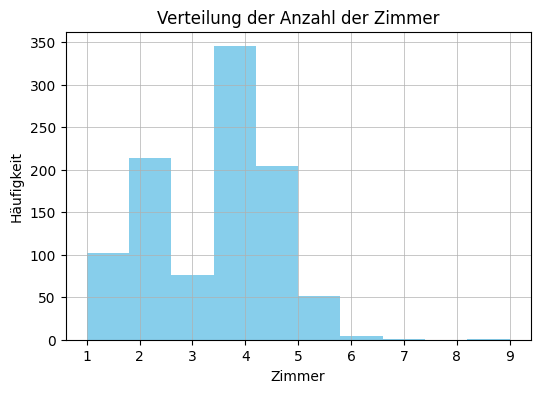

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')
df = pd.read_sql("SELECT * FROM apartments_table", conn)

# Histogramm für die Anzahl der Zimmer ('rooms') erstellen
plt.figure(figsize=(6,4))
df['rooms'].plot.hist(bins=10, color='skyblue')
plt.title('Verteilung der Anzahl der Zimmer')
plt.xlabel('Zimmer')
plt.ylabel('Häufigkeit')
plt.grid(linestyle='-', linewidth=0.5)
plt.show()

# Verbindung schließen
conn.close()


### Aufgabe 1: Durchschnittlicher Preis pro Quadratmeter visualisieren

Berechne den durchschnittlichen Preis pro Quadratmeter (price_per_m2) und erstelle ein Balkendiagramm, das die durchschnittlichen Preise pro Anzahl der Zimmer (rooms) zeigt.

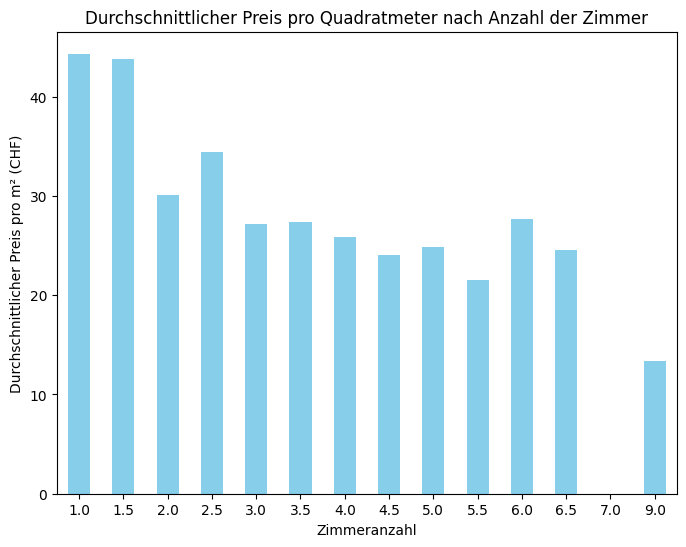

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')
df = pd.read_sql("SELECT * FROM apartments_table", conn)

# Berechnung des durchschnittlichen Preises pro Quadratmeter pro Zimmeranzahl
avg_price_per_m2 = df.groupby('rooms')['price_per_m2'].mean()

# Visualisierung
plt.figure(figsize=(8, 6))
avg_price_per_m2.plot(kind='bar', color='skyblue')
plt.title('Durchschnittlicher Preis pro Quadratmeter nach Anzahl der Zimmer')
plt.xlabel('Zimmeranzahl')
plt.ylabel('Durchschnittlicher Preis pro m² (CHF)')
plt.xticks(rotation=0)
plt.show()

# Verbindung schließen
conn.close()


### Aufgabe 2: Verteilung der Wohnungsgrößen (area) darstellen

Erstelle ein Histogramm, das die Verteilung der Wohnungsgrößen (area) zeigt.

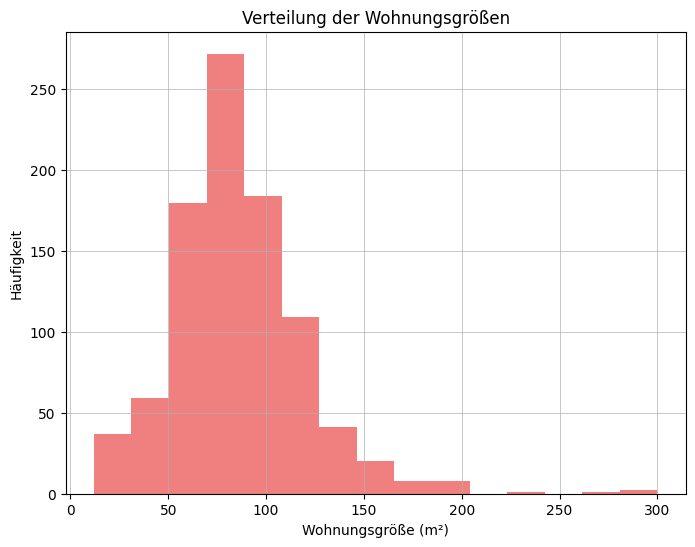

In [15]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')
df = pd.read_sql("SELECT * FROM apartments_table", conn)

# Histogramm für die Verteilung der Wohnungsgrößen
plt.figure(figsize=(8, 6))
df['area'].plot.hist(bins=15, color='lightcoral')
plt.title('Verteilung der Wohnungsgrößen')
plt.xlabel('Wohnungsgröße (m²)')
plt.ylabel('Häufigkeit')
plt.grid(linestyle='-', linewidth=0.5)
plt.show()

# Verbindung schließen
conn.close()


### Aufgabe 3: Scatterplot von Preis pro m² gegen Wohnungsgröße

Erstelle ein Scatterplot, das den Preis pro Quadratmeter (price_per_m2) gegen die Wohnungsgröße (area) zeigt. Damit kannst du erkennen, ob größere Wohnungen im Durchschnitt günstiger oder teurer pro Quadratmeter sind.

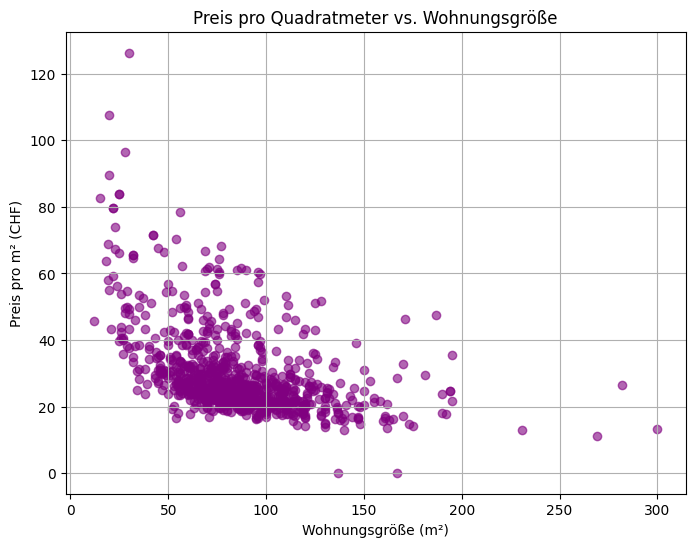

In [16]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')
df = pd.read_sql("SELECT * FROM apartments_table", conn)

# Scatterplot von Preis pro m² gegen Wohnungsgröße
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price_per_m2'], color='purple', alpha=0.6)
plt.title('Preis pro Quadratmeter vs. Wohnungsgröße')
plt.xlabel('Wohnungsgröße (m²)')
plt.ylabel('Preis pro m² (CHF)')
plt.grid(True)
plt.show()

# Verbindung schließen
conn.close()


### Aufgabe 4: Wohnungen über einem bestimmten Preis herausfiltern und darstellen

Filtern Sie alle Wohnungen, deren Preis höher als 3000 CHF ist, und stellen Sie die Anzahl der Zimmer dieser Wohnungen in einem Balkendiagramm dar.

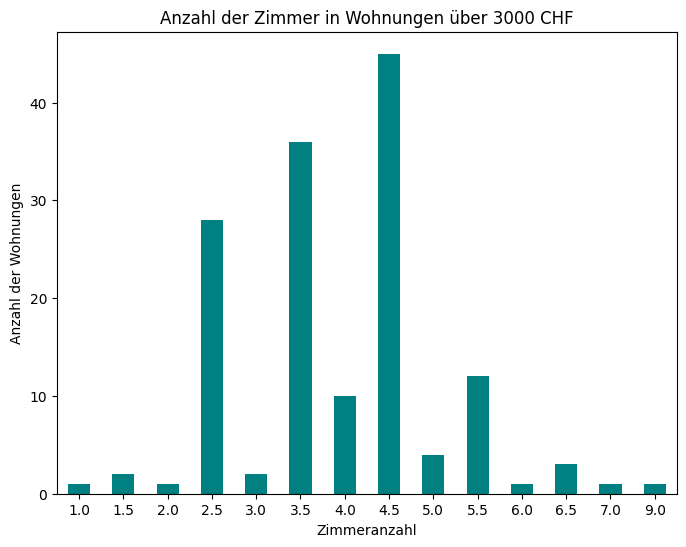

In [17]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')
df = pd.read_sql("SELECT * FROM apartments_table WHERE price > 3000", conn)

# Balkendiagramm für die Anzahl der Zimmer in Wohnungen über 3000 CHF
plt.figure(figsize=(8, 6))
df['rooms'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Anzahl der Zimmer in Wohnungen über 3000 CHF')
plt.xlabel('Zimmeranzahl')
plt.ylabel('Anzahl der Wohnungen')
plt.xticks(rotation=0)
plt.show()

# Verbindung schließen
conn.close()

### Aufgabe 5: Durchschnittlicher Mietpreis pro Stadtteil

Falls die Daten eine Location-Spalte haben, berechne den durchschnittlichen Mietpreis für Wohnungen in jedem Stadtteil und erstelle ein Balkendiagramm.

In [ ]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('apartment_database.db')
df = pd.read_sql("SELECT * FROM apartments_table", conn)

# Durchschnittlicher Preis pro Stadtteil berechnen
avg_price_per_location = df.groupby('Location')['price'].mean()

# Balkendiagramm für den durchschnittlichen Mietpreis pro Stadtteil
plt.figure(figsize=(10, 6))
avg_price_per_location.plot(kind='bar', color='cornflowerblue')
plt.title('Durchschnittlicher Mietpreis pro Stadtteil')
plt.xlabel('Stadtteil')
plt.ylabel('Durchschnittlicher Mietpreis (CHF)')
plt.xticks(rotation=45)
plt.show()

# Verbindung schließen
conn.close()


THE END